In [1]:
from matplotlib import pyplot as plt
from langdetect import detect, DetectorFactory

import sys
import os
import pickle

import pandas as pd
import humanize

data_path = "../data/channel_messages"

In [2]:
all_files, all_data = os.listdir(data_path), []
total_bytes = sum(os.path.getsize(os.path.join(data_path, file)) for file in all_files)
print("Total size of files: ", humanize.naturalsize(total_bytes))

# use chunksize to read file in chunks, print progress
for i, file in enumerate(all_files):
    print(f"Reading file {i + 1} of {len(all_files)}", end="\r")
    with open(os.path.join(data_path, file), "rb") as f:
        all_data.append(pickle.load(f))
print(f"Read {len(all_data)} files")

total_messages = sum(len(data) for data in all_data)
print(f"Total messages: {total_messages}")

Total size of files:  631.2 MB
Read 8 files 8 of 8
Total messages: 335163


In [3]:
print(f"First message: {all_data[0].popitem()}")

First message: (1, pyrogram.types.Message(id=1, sender_chat=pyrogram.types.Chat(id=-1001394092619, type=pyrogram.enums.ChatType.CHANNEL, is_verified=False, is_restricted=False, is_creator=False, is_scam=False, is_fake=False, title='Україна⚡️Новини⚡️Війна', photo=pyrogram.types.ChatPhoto(small_file_id='AQADAgADSrIxG0eUkEoAEAIAA7XFQtgW____5SrxvGSs4GUABB4E', small_photo_unique_id='AgADSrIxG0eUkEo', big_file_id='AQADAgADSrIxG0eUkEoAEAMAA7XFQtgW____5SrxvGSs4GUABB4E', big_photo_unique_id='AgADSrIxG0eUkEo'), dc_id=2, has_protected_content=False), date=datetime.datetime(2020, 3, 17, 10, 11, 29), chat=pyrogram.types.Chat(id=-1001394092619, type=pyrogram.enums.ChatType.CHANNEL, is_verified=False, is_restricted=False, is_creator=False, is_scam=False, is_fake=False, title='Україна⚡️Новини⚡️Війна', photo=pyrogram.types.ChatPhoto(small_file_id='AQADAgADSrIxG0eUkEoAEAIAA7XFQtgW____5SrxvGSs4GUABB4E', small_photo_unique_id='AgADSrIxG0eUkEo', big_file_id='AQADAgADSrIxG0eUkEoAEAMAA7XFQtgW____5SrxvGSs4GUA

In [5]:
message = all_data[3].popitem()[1]
print(f"Message: {message}")
if message.text is not None:
    text = message.text
elif message.caption is not None:
    text = message.caption
else:
    text = ""
DetectorFactory.seed = 0
print(f"Text: {text}")
print(f"Language: {detect(text)}")

Message: {
    "_": "Message",
    "id": 1,
    "sender_chat": {
        "_": "Chat",
        "id": -1001449473117,
        "type": "ChatType.CHANNEL",
        "is_verified": false,
        "is_restricted": false,
        "is_creator": false,
        "is_scam": false,
        "is_fake": false,
        "title": "НОВИНА 🇺🇦 Україна",
        "photo": {
            "_": "ChatPhoto",
            "small_file_id": "AQADAgADOcQxG1jXoEoAEAIAA6O79dQW____rga1aWm2dBUABB4E",
            "small_photo_unique_id": "AgADOcQxG1jXoEo",
            "big_file_id": "AQADAgADOcQxG1jXoEoAEAMAA6O79dQW____rga1aWm2dBUABB4E",
            "big_photo_unique_id": "AgADOcQxG1jXoEo"
        },
        "dc_id": 2,
        "has_protected_content": false
    },
    "date": "2019-03-23 21:23:01",
    "chat": {
        "_": "Chat",
        "id": -1001449473117,
        "type": "ChatType.CHANNEL",
        "is_verified": false,
        "is_restricted": false,
        "is_creator": false,
        "is_scam": false,
        "is

LangDetectException: No features in text.

In [6]:
df_data = []
total_processed = 0
for channel in all_data:
    for i, message in enumerate(channel.values()):
        total_processed += 1
        if message.reactions is None:
            continue

        if i % 10000 == 0:
            print(f"Processed {total_processed}/{total_messages} messages", end="\r")

        prepared_message = {
            "id": message.id,
            "source": message.chat.title,
            "date": message.date,
            "caption": message.caption,
            "text": message.text,
            "views": message.views,
            "forwards": message.forwards,
            "containing_media": message.media is not None,
        }

        for r in message.reactions.reactions:
            prepared_message[r.emoji] = r.count

        df_data.append(prepared_message)

df = pd.DataFrame(df_data)

In [7]:
print(f"Shape of df: {df.shape}")
print(f"Size of df: {humanize.naturalsize(sys.getsizeof(df))}")
df.head(20)

Shape of df: (220809, 75)
Size of df: 359.7 MB


,id,source,date,caption,text,views,forwards,containing_media,🤬,👍,...,🎄,🎃,🎅,💘,🆒,💅,🤗,🤓,😘,😴
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24 15:21:38,None,🏦 Колишні російські власники вже державного Се...,52846,45,False,487.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24 14:46:22,None,❤️‍🩹 Кожна хвилина на фронті - це життя військ...,70636,0,False,6.0,423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24 14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,None,81139,214,True,88.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24 13:56:32,Більш ніж половина українських громадян — 56% ...,None,88168,46,True,12.0,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24 13:04:26,"""Це процес, який буде тривати і набирати оберт...",None,101748,58,True,7.0,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51961,Україна⚡️Новини⚡️Війна,2023-07-24 12:30:43,Нардепу від ОПЗЖ Пономарьову СБУ повідомила пр...,None,107323,56,True,240.0,1995.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,51959,Україна⚡️Новини⚡️Війна,2023-07-24 11:31:33,Журналіст The New York Times Крістіан Тріберт ...,None,110332,69,True,1565.0,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,51957,Україна⚡️Новини⚡️Війна,2023-07-24 11:14:11,"🤡 Пропагандист соловйов закликав ""знести"" уряд...",None,107424,104,True,4.0,107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,51956,Україна⚡️Новини⚡️Війна,2023-07-24 11:03:46,⚡️ДБР затримало одеського ексвійськкома Євгена...,None,110230,173,True,5.0,2505.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,51953,Україна⚡️Новини⚡️Війна,2023-07-24 11:00:36,кацапзмі показали момент прольоту невідомого Б...,None,108677,81,True,5.0,2093.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# replace all None in caption and text with ""
df["caption"] = df["caption"].fillna("")
df["text"] = df["text"].fillna("")

# combine caption and text into one column
df["text"] = df["caption"] + " " + df["text"]
df = df.drop(["caption"], axis=1)

df.head(20)

,id,source,date,text,views,forwards,containing_media,🤬,👍,🤔,...,🎄,🎃,🎅,💘,🆒,💅,🤗,🤓,😘,😴
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24 15:21:38,🏦 Колишні російські власники вже державного С...,52846,45,False,487.0,101.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24 14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636,0,False,6.0,423.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24 14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,81139,214,True,88.0,32.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24 13:56:32,Більш ніж половина українських громадян — 56% ...,88168,46,True,12.0,503.0,289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24 13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748,58,True,7.0,330.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51961,Україна⚡️Новини⚡️Війна,2023-07-24 12:30:43,Нардепу від ОПЗЖ Пономарьову СБУ повідомила пр...,107323,56,True,240.0,1995.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,51959,Україна⚡️Новини⚡️Війна,2023-07-24 11:31:33,Журналіст The New York Times Крістіан Тріберт ...,110332,69,True,1565.0,122.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,51957,Україна⚡️Новини⚡️Війна,2023-07-24 11:14:11,"🤡 Пропагандист соловйов закликав ""знести"" уряд...",107424,104,True,4.0,107.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,51956,Україна⚡️Новини⚡️Війна,2023-07-24 11:03:46,⚡️ДБР затримало одеського ексвійськкома Євгена...,110230,173,True,5.0,2505.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,51953,Україна⚡️Новини⚡️Війна,2023-07-24 11:00:36,кацапзмі показали момент прольоту невідомого Б...,108677,81,True,5.0,2093.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
# define lang for each message
# print progress
DetectorFactory.seed = 0
for i, text in enumerate(df["text"]):
    if i % 10000 == 0:
        print(f"Processed {i}/{df.shape[0]} messages", end="\r")
    try:
        df.loc[i, "lang"] = detect(text)
    except:
        df.loc[i, "lang"] = "unknown"

# get random 20 messages and print them
df.sample(20)

,id,source,date,text,views,forwards,🤬,👍,🤔,❤,...,🎃,🎅,💘,🆒,💅,🤗,🤓,😘,😴,lang
185796,28807,ТСН новини / ТСН.ua,2022-04-20 17:13:45,❗️В Росії високопосадовці все більше критикую...,324673,207,406.0,3332.0,57.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
6851,43323,Україна⚡️Новини⚡️Війна,2023-03-09 08:14:41,"😢Голова Золочівської громади, що на Львівщині,...",260464,242,429.0,207.0,2.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
139806,93298,ТСН новини / ТСН.ua,2023-07-19 19:47:19,Протягом усього дня максимум уваги – ліквідаці...,175726,3,NaN,1620.0,NaN,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
199530,28750,Ukraine NOW,2023-02-09 10:37:47,росія зможе повернутися до кола цивілізованих...,163344,66,120.0,2984.0,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
214939,8303,Ukraine NOW,2022-04-02 23:12:24,‼️Харків та область — повітряна тривога.,400303,100,NaN,NaN,NaN,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
49222,11282,"Доброго вечора, ми з України👋",2022-04-03 08:12:48,Вночі росія з повітря атакувала Одесу. В деяки...,140112,159,NaN,142.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
80111,39646,НОВИНА 🇺🇦 Україна,2022-10-22 09:14:03,"❗️Повідомляють, що в Хмельницькому після вибух...",166909,85,433.0,105.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
189687,23907,ТСН новини / ТСН.ua,2022-03-13 03:40:01,🔴Хмельницька область! Повітряна тривога! Усі ...,366698,479,991.0,82.0,8.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
102274,34146,ҐРУНТ,2023-06-28 16:46:08,"✍️ Одночасно з тим, як Швейцарія не дозволила...",50061,23,NaN,1069.0,228.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
67735,55485,НОВИНА 🇺🇦 Україна,2023-04-08 22:45:19,Коротко. Війна. День 409. Відеодайджест\n\nНОВ...,177061,3,NaN,166.0,7.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk


In [166]:
# get list of all languages
langs = df["lang"].unique()
print(f"Languages: {langs}")

Languages: ['uk' 'ru' 'unknown' 'bg' 'et' 'de' 'ca' 'en' 'mk' 'tr' 'nl' 'fr' 'fa'
 'sk' 'it' 'zh-cn' 'tl' 'pt' 'fi' 'es' 'pl' 'sv' 'af']


In [169]:
# count of messages in each language
df["lang"].value_counts()
# delete all messages that are not in uk
df = df[df["lang"] == "uk"]
df = df.drop(["lang"], axis=1)
print(f"Shape of df: {df.shape}")

Shape of df: (197626, 73)


In [2]:
# save dataframe
df_path = "../data/processed_data_multichannel.csv"
# df.to_csv(df_path, index=False)

In [3]:
# read dataframe
df = pd.read_csv(df_path)

In [4]:
df

,id,source,date,text,views,forwards,containing_media,🤬,👍,🤔,...,🎄,🎃,🎅,💘,🆒,💅,🤗,🤓,😘,😴
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24 15:21:38,🏦 Колишні російські власники вже державного С...,52846,45,False,487.0,101.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24 14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636,0,False,6.0,423.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24 14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,81139,214,True,88.0,32.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24 13:56:32,Більш ніж половина українських громадян — 56% ...,88168,46,True,12.0,503.0,289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24 13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748,58,True,7.0,330.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220804,6,Ukraine NOW,2020-03-07 12:01:00,Міністерство охорони здоров’я України запусти...,62571,145,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220805,5,Ukraine NOW,2020-03-07 11:12:13,Станом на ранок 7 березня 2020 року в Україні...,52026,113,False,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220806,4,Ukraine NOW,2020-03-06 15:05:12,Станом на 6 березня в Україні не зареєстрован...,54973,153,False,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220807,36620,Ukraine NOW,2023-07-24 12:57:49,Голові Державної судової адміністрації України...,72049,135,True,141.0,1144.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='source'>

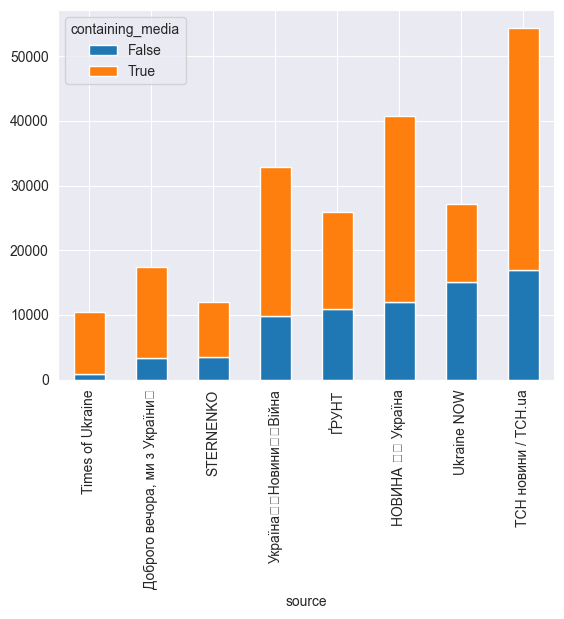

In [5]:
# hide warnings
import warnings
warnings.filterwarnings("ignore")

# count messages with and without media by source
df.groupby("source")["containing_media"].value_counts()
# plot it sorted count of messages without media
df.groupby("source")["containing_media"].value_counts().unstack().sort_values(by=False).plot(kind="bar", stacked=True)

In [6]:
# split date into date and time
df["time"] = df["date"].apply(lambda x: x.split(" ")[1])
df["date"] = df["date"].apply(lambda x: x.split(" ")[0])

In [7]:
df.head(20)

,id,source,date,text,views,forwards,containing_media,🤬,👍,🤔,...,🎃,🎅,💘,🆒,💅,🤗,🤓,😘,😴,time
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24,🏦 Колишні російські власники вже державного С...,52846,45,False,487.0,101.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:21:38
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636,0,False,6.0,423.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:46:22
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24,Говорящая голова бульбафюрера Азарёнок на глав...,81139,214,True,88.0,32.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:20:49
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24,Більш ніж половина українських громадян — 56% ...,88168,46,True,12.0,503.0,289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13:56:32
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24,"""Це процес, який буде тривати і набирати оберт...",101748,58,True,7.0,330.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13:04:26
5,51961,Україна⚡️Новини⚡️Війна,2023-07-24,Нардепу від ОПЗЖ Пономарьову СБУ повідомила пр...,107323,56,True,240.0,1995.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:30:43
6,51959,Україна⚡️Новини⚡️Війна,2023-07-24,Журналіст The New York Times Крістіан Тріберт ...,110332,69,True,1565.0,122.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:31:33
7,51957,Україна⚡️Новини⚡️Війна,2023-07-24,"🤡 Пропагандист соловйов закликав ""знести"" уряд...",107424,104,True,4.0,107.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:14:11
8,51956,Україна⚡️Новини⚡️Війна,2023-07-24,⚡️ДБР затримало одеського ексвійськкома Євгена...,110230,173,True,5.0,2505.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:03:46
9,51953,Україна⚡️Новини⚡️Війна,2023-07-24,кацапзмі показали момент прольоту невідомого Б...,108677,81,True,5.0,2093.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:00:36


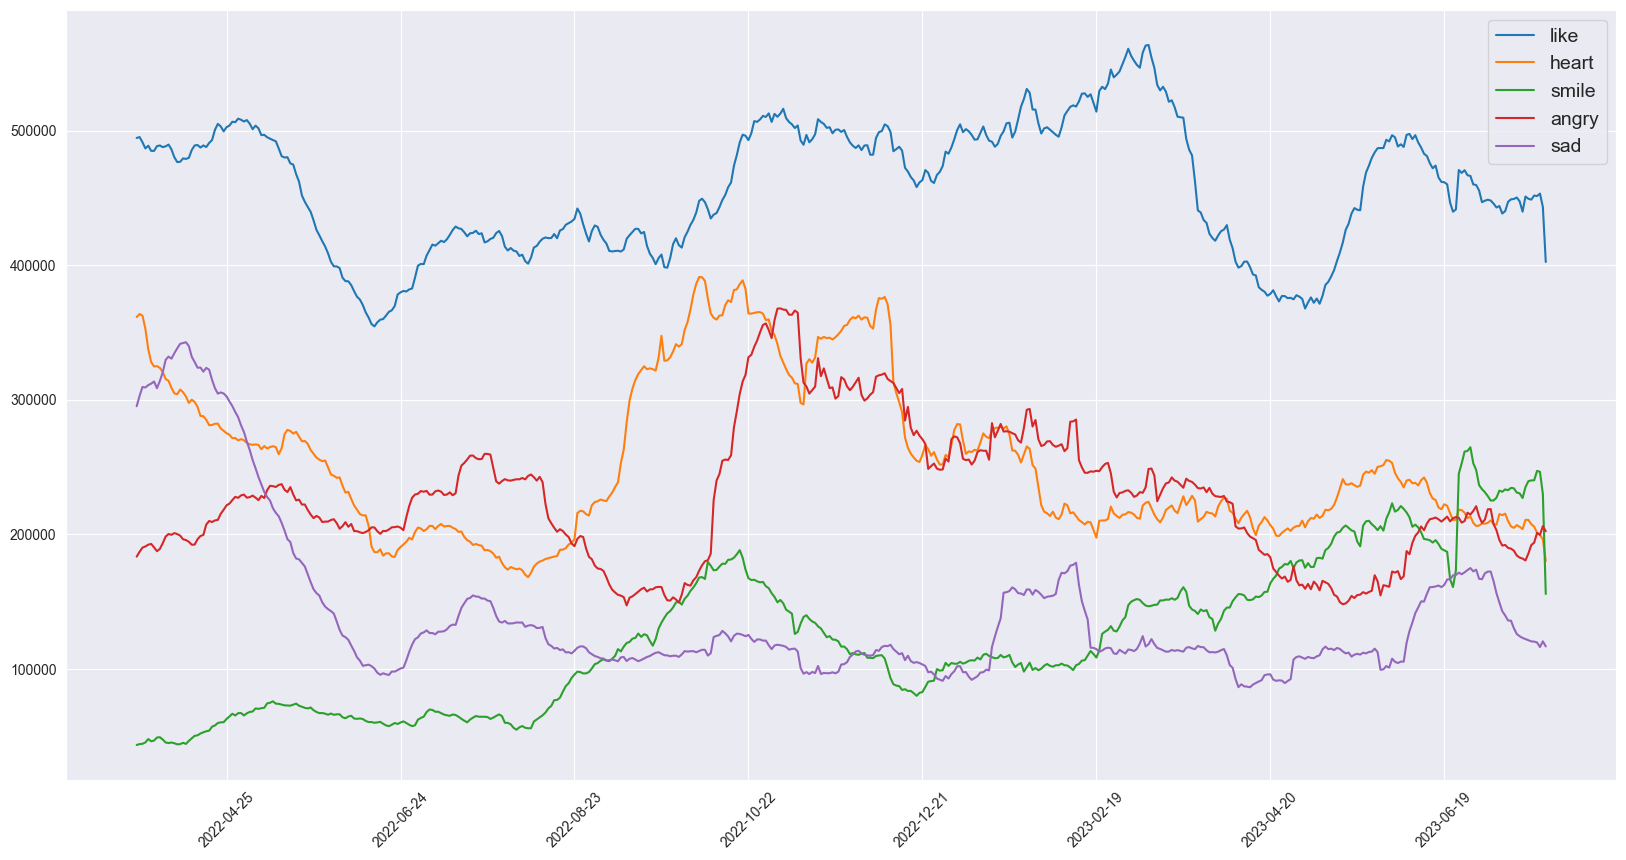

In [8]:
# import MaxNLocator to auto-select the number of x-axis ticks
from matplotlib.ticker import MaxNLocator


emoji = ("like", "heart", "smile", "angry", "sad")
as_unicode = ("👍", "❤", "😁", "🤬", "😢")
emoji_dict = dict(zip(as_unicode, emoji))


# plot time series of most popular reactions
fig, ax = plt.subplots()

cut_df = df[df["date"] >= "2022-02-24"]  # Cut the data to only include messages from 2020-03-07

# group by days, plot curve for each reaction
for r in as_unicode:
    group = cut_df.groupby("date")[r].sum()
    group = group.rolling(30).mean()  # Smooth the data with a moving average

    ax.plot(group.index, group.values, label=emoji_dict[r])  # Plot the time series for the reaction

fig.set_size_inches(20, 10)
plt.rcParams.update({"font.size": 14})
ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))  # Auto-select the number of x-axis ticks
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [9]:
# find correlation between reactions
# cut_df[as_unicode[0]].corr(cut_df[as_unicode[1]])

# find 10 most popular reactions from all reactions
non_reactions_columns = ["id", "source", "date", "time", "text", "views", "forwards", "containing_media"]
reactions_columns = [c for c in cut_df.columns if c not in non_reactions_columns]
top_reactions = cut_df[reactions_columns].sum().sort_values(ascending=False)[:10]
top_reactions


👍    235775569.0
❤    131686816.0
🤬    116368455.0
😢     73950747.0
😁     62758699.0
🔥     28889288.0
🙏     15506571.0
🤡     11778870.0
💩     10282236.0
🎉      7682156.0
dtype: float64

In [10]:
import pandas as pd

new_columns = non_reactions_columns + list(top_reactions.index)
cut_df = cut_df[new_columns]
cut_df.head(20)

,id,source,date,time,text,views,forwards,containing_media,👍,❤,🤬,😢,😁,🔥,🙏,🤡,💩,🎉
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24,15:21:38,🏦 Колишні російські власники вже державного С...,52846,45,False,101.0,7.0,487.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24,14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636,0,False,423.0,122.0,6.0,NaN,8.0,7.0,NaN,NaN,NaN,NaN
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24,14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,81139,214,True,32.0,2.0,88.0,NaN,13.0,9.0,NaN,419.0,1763.0,NaN
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24,13:56:32,Більш ніж половина українських громадян — 56% ...,88168,46,True,503.0,25.0,12.0,6.0,18.0,NaN,NaN,5.0,19.0,NaN
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24,13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748,58,True,330.0,1663.0,7.0,NaN,44.0,552.0,NaN,23.0,8.0,NaN
5,51961,Україна⚡️Новини⚡️Війна,2023-07-24,12:30:43,Нардепу від ОПЗЖ Пономарьову СБУ повідомила пр...,107323,56,True,1995.0,22.0,240.0,2.0,9.0,69.0,NaN,NaN,17.0,NaN
6,51959,Україна⚡️Новини⚡️Війна,2023-07-24,11:31:33,Журналіст The New York Times Крістіан Тріберт ...,110332,69,True,122.0,32.0,1565.0,1.0,5.0,23.0,NaN,NaN,59.0,NaN
7,51957,Україна⚡️Новини⚡️Війна,2023-07-24,11:14:11,"🤡 Пропагандист соловйов закликав ""знести"" уряд...",107424,104,True,107.0,24.0,4.0,NaN,275.0,10.0,NaN,2836.0,588.0,NaN
8,51956,Україна⚡️Новини⚡️Війна,2023-07-24,11:03:46,⚡️ДБР затримало одеського ексвійськкома Євгена...,110230,173,True,2505.0,28.0,5.0,NaN,51.0,286.0,NaN,13.0,31.0,NaN
9,51953,Україна⚡️Новини⚡️Війна,2023-07-24,11:00:36,кацапзмі показали момент прольоту невідомого Б...,108677,81,True,2093.0,59.0,5.0,NaN,20.0,575.0,NaN,11.0,NaN,NaN


In [11]:
reactions_labels = {
    "like": "👍",
    "heart": "❤",
    "angry": "🤬",
    "sad": "😢",
    "smile": "😁",
    "fire": "🔥",
    "pray": "🙏",
    "clown": "🤡",
    "party": "🎉",
    "s": "💩"
}

reverse_labels = {v: k for k, v in reactions_labels.items()}

# replace column emoji names with text names
cut_df.rename(columns=reverse_labels, inplace=True)
cut_df.head()

,id,source,date,time,text,views,forwards,containing_media,like,heart,angry,sad,smile,fire,pray,clown,s,party
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24,15:21:38,🏦 Колишні російські власники вже державного С...,52846,45,False,101.0,7.0,487.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24,14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636,0,False,423.0,122.0,6.0,NaN,8.0,7.0,NaN,NaN,NaN,NaN
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24,14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,81139,214,True,32.0,2.0,88.0,NaN,13.0,9.0,NaN,419.0,1763.0,NaN
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24,13:56:32,Більш ніж половина українських громадян — 56% ...,88168,46,True,503.0,25.0,12.0,6.0,18.0,NaN,NaN,5.0,19.0,NaN
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24,13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748,58,True,330.0,1663.0,7.0,NaN,44.0,552.0,NaN,23.0,8.0,NaN


In [12]:
top_reactions = cut_df[reverse_labels.values()].sum().sort_values(ascending=False)
top_reactions

like     235775569.0
heart    131686816.0
angry    116368455.0
sad       73950747.0
smile     62758699.0
fire      28889288.0
pray      15506571.0
clown     11778870.0
s         10282236.0
party      7682156.0
dtype: float64

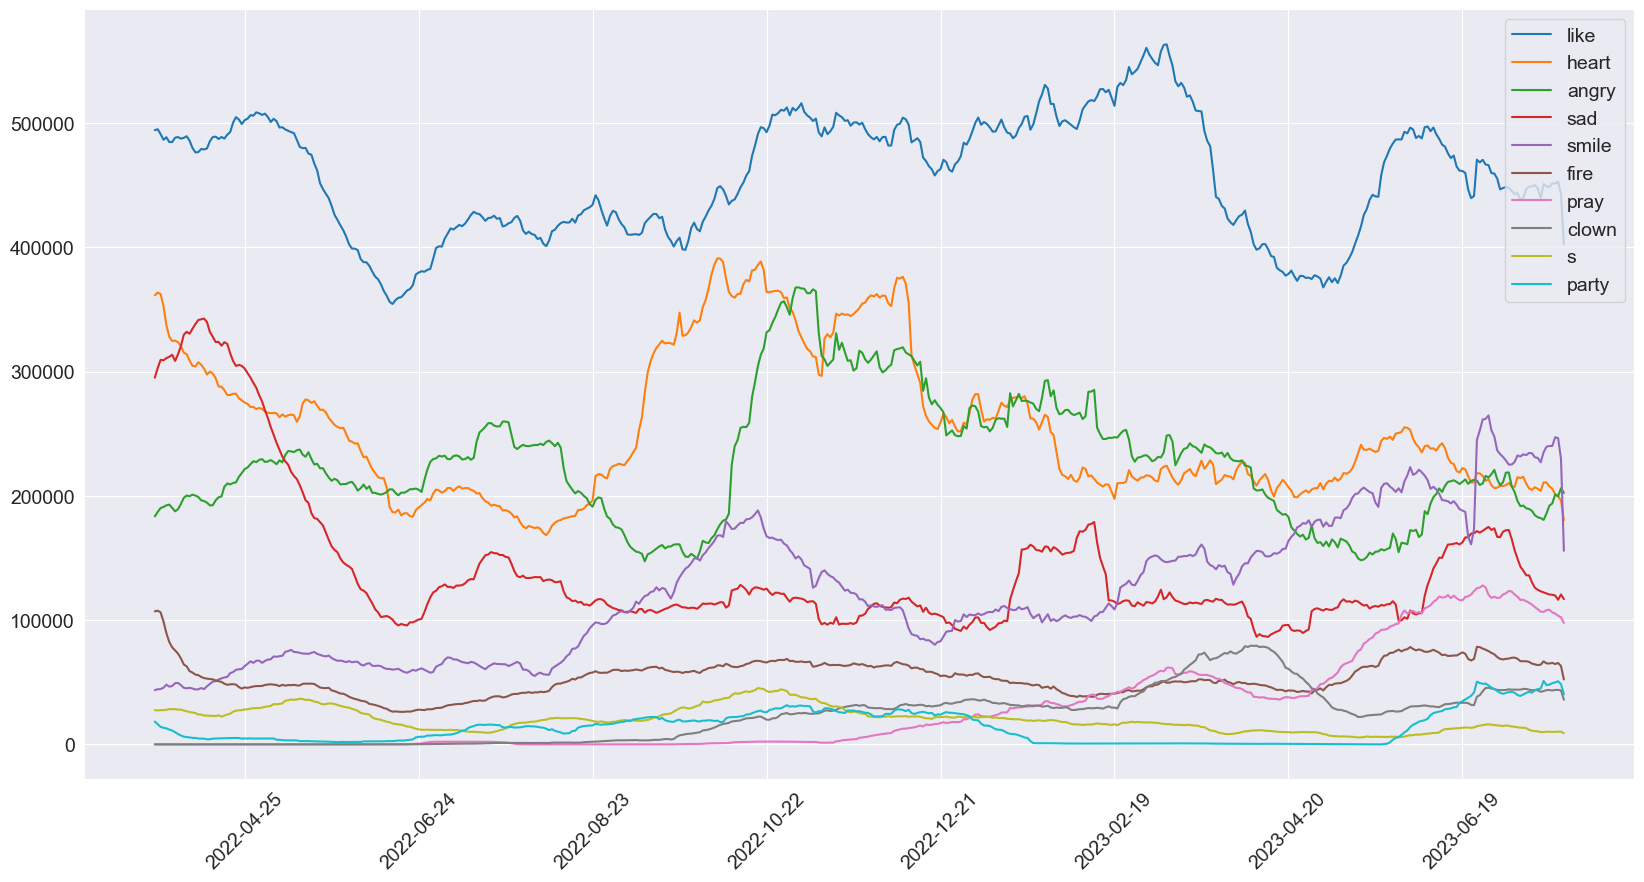

In [13]:
# plot time series of most popular reactions
fig, ax = plt.subplots()

# group by days, plot curve for each reaction
for r in top_reactions.index:
    group = cut_df.groupby("date")[r].sum()
    group = group.rolling(30).mean()  # Smooth the data with a moving average

    ax.plot(group.index, group.values, label=r)  # Plot the time series for the reaction

fig.set_size_inches(20, 10)
plt.rcParams.update({"font.size": 14})
ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))  # Auto-select the number of x-axis ticks
plt.xticks(rotation=45)
ax.legend()
plt.show()

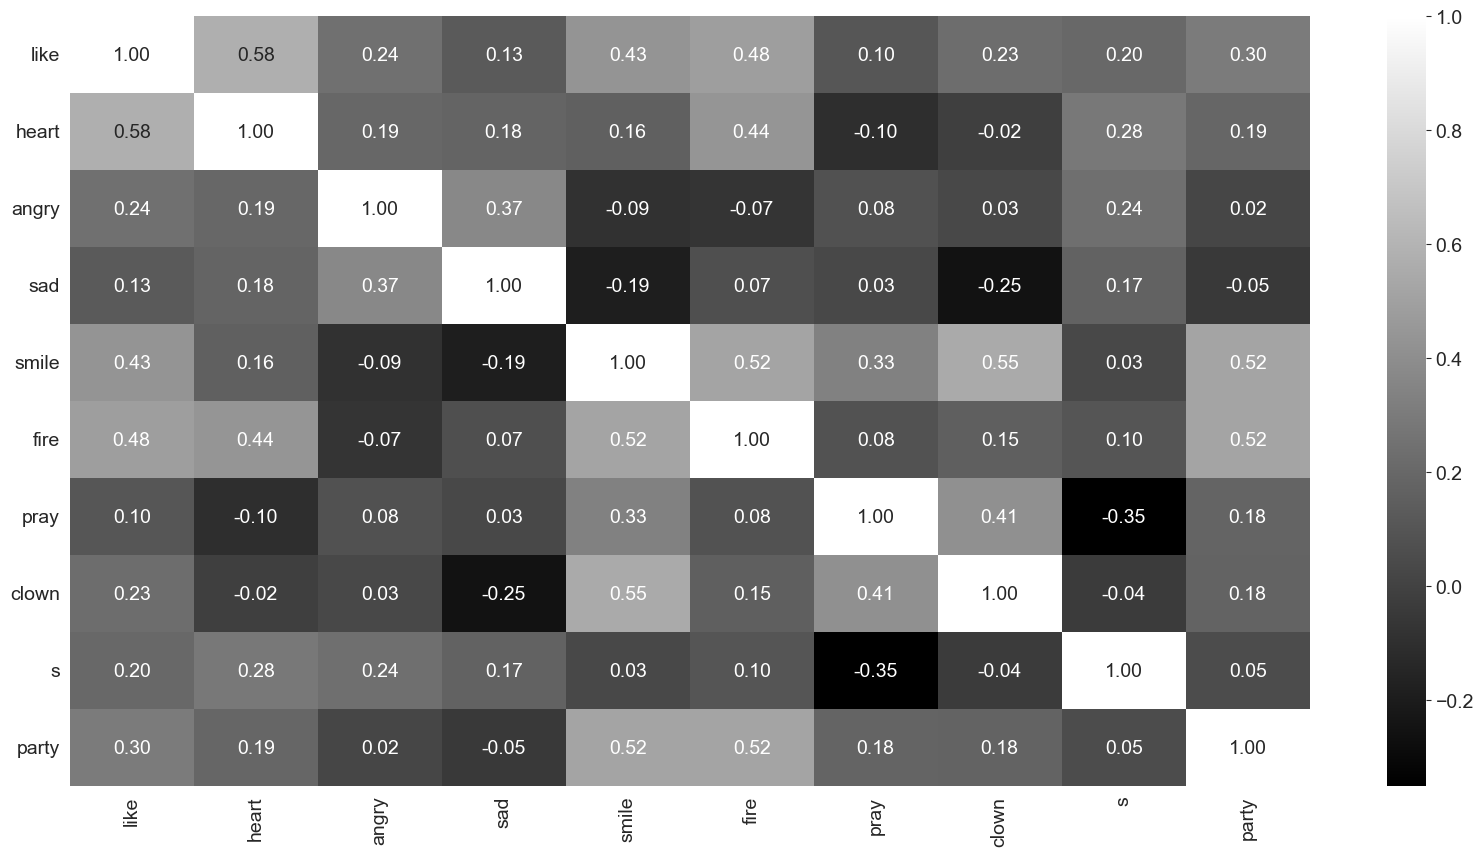

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_heatmap(cut_df, top_reactions):
    """
    Search for correlation between the top 10 reactions in the DataFrame.

    Parameters:
        cut_df (pandas.DataFrame): The DataFrame containing the time series data.
        top_reactions (list): List of column names representing the top 10 reactions.

    Returns:
        None (Displays a heatmap of the correlation matrix).
    """
    # Group the DataFrame by date and sum the top 10 reactions
    group = cut_df.groupby("date")[top_reactions].sum()

    # Create a heatmap to visualize the correlation matrix
    fig, ax = plt.subplots()
    sns.heatmap(group.corr(), annot=True, fmt=".2f", cmap="gray", ax=ax)
    fig.set_size_inches(20, 10)
    plt.rcParams.update({"font.size": 14})
    plt.show()

correlation_heatmap(cut_df, top_reactions.index)

In [15]:
correlation = cut_df.groupby("date")[top_reactions.index].sum().corr()
print(f"Average correlation between reactions: {correlation.mean().mean()}")

Average correlation between reactions: 0.2521645174575754


In [16]:
reactions_df = cut_df[list(reverse_labels.values()) + ["date"]]
reactions_df.head(20)

,like,heart,angry,sad,smile,fire,pray,clown,party,s,date
0,101.0,7.0,487.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2023-07-24
1,423.0,122.0,6.0,NaN,8.0,7.0,NaN,NaN,NaN,NaN,2023-07-24
2,32.0,2.0,88.0,NaN,13.0,9.0,NaN,419.0,NaN,1763.0,2023-07-24
3,503.0,25.0,12.0,6.0,18.0,NaN,NaN,5.0,NaN,19.0,2023-07-24
4,330.0,1663.0,7.0,NaN,44.0,552.0,NaN,23.0,NaN,8.0,2023-07-24
5,1995.0,22.0,240.0,2.0,9.0,69.0,NaN,NaN,NaN,17.0,2023-07-24
6,122.0,32.0,1565.0,1.0,5.0,23.0,NaN,NaN,NaN,59.0,2023-07-24
7,107.0,24.0,4.0,NaN,275.0,10.0,NaN,2836.0,NaN,588.0,2023-07-24
8,2505.0,28.0,5.0,NaN,51.0,286.0,NaN,13.0,NaN,31.0,2023-07-24
9,2093.0,59.0,5.0,NaN,20.0,575.0,NaN,11.0,NaN,NaN,2023-07-24


In [17]:
import numpy as np
import pandas as pd

from itertools import combinations

def find_low_correlation(reactions_df, n):
    """
    Search for combinations of 'n' reactions with low correlation.

    Parameters:
        reactions_df (pandas.DataFrame): The DataFrame containing the time series data.
        n (int): The number of reactions in each combination.

    Returns:
        dict: A dictionary containing the information about the combination with low correlation.
    """
    result = {
        "r1": "",
        "r2": "",
        "correlation": 1,
    }

    labels = reactions_df.columns
    labels = labels.drop("date")

    # Get all combinations of 'n' reactions
    reaction_combinations = combinations(labels, n)

    total_combinations = len(list(combinations(labels, n)))
    processed_combinations = 0

    for combo in reaction_combinations:
        # Merge the 'n' reactions in the combination
        temp_df = reactions_df.copy()
        merged_reaction = "_".join(combo)
        temp_df[merged_reaction] = temp_df[list(combo)].sum(axis=1)
        temp_df = temp_df.drop(list(combo), axis=1)
        temp_columns = list(temp_df.columns)
        temp_columns.remove("date")

        # Calculate correlation
        group = temp_df.groupby("date")[temp_columns].sum()
        correlation = group.corr()

        # Calculate the mean correlation (ignoring diagonal elements)
        cor_mean = correlation.values[np.triu_indices_from(correlation, k=1)].mean()

        # Check if the correlation is lower than the current result and there's a positive correlation between the merged reactions
        if cor_mean < result["correlation"]:
            result["r1"] = merged_reaction
            result["r2"] = combo
            result["correlation"] = cor_mean

        # Print progress
        processed_combinations += 1
        if processed_combinations % 10 == 0:
            print(f"Processed {processed_combinations}/{total_combinations} combinations", end="\r")


    return result


low_correlation = find_low_correlation(reactions_df, 5)
low_correlation

# 1: smile, fire, part
# 2: like, heart
# 3: angry, sad

{'r1': 'like_heart_smile_fire_party',
 'r2': ('like', 'heart', 'smile', 'fire', 'party'),
 'correlation': 0.10306384799537642}

In [18]:
correlation = cut_df.groupby("date")[top_reactions.index].sum().corr()
print(f"Average correlation between reactions: {correlation.mean().mean()}")

Average correlation between reactions: 0.2521645174575754


Average correlation between reactions: 0.44262838765547613


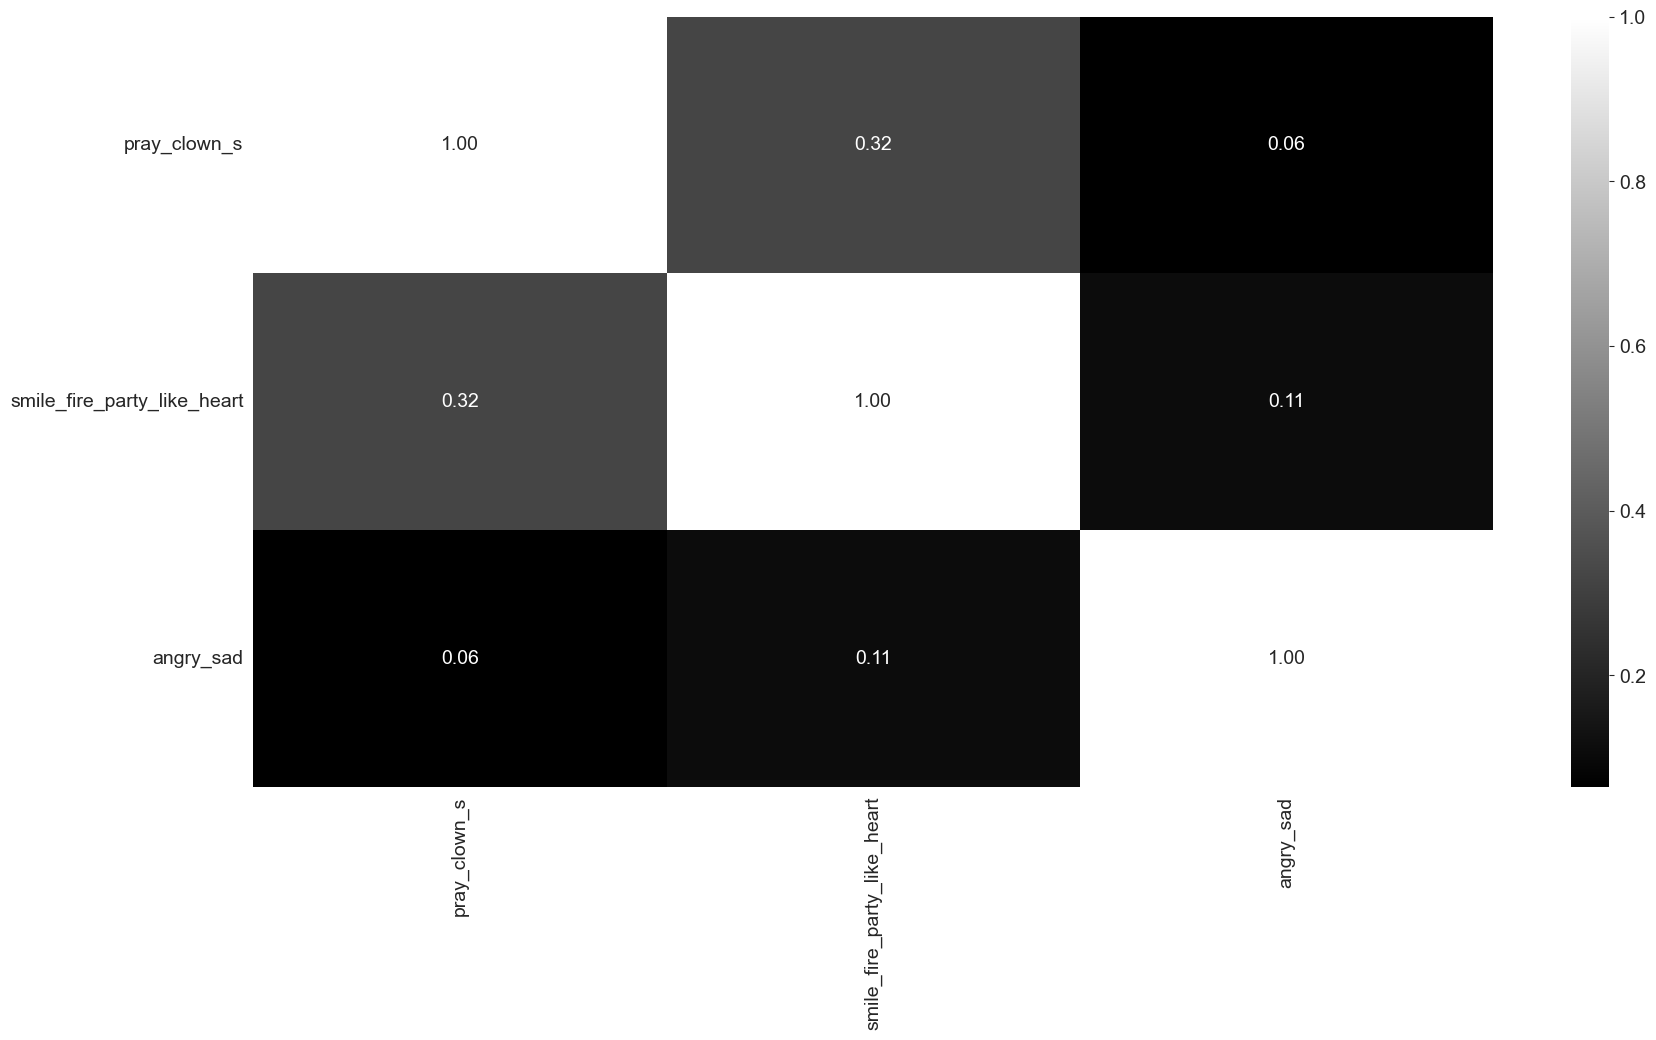

In [19]:
merge1 = ["smile", "fire", "party", "like", "heart"]
merge2 = ["pray", "clown", "s"]
merge3 = ["angry", "sad"]
merges = [merge1, merge2, merge3]

merged_df = cut_df.copy()
for merge in merges:
    merged_reaction = "_".join(merge)
    merged_df[merged_reaction] = merged_df[merge].sum(axis=1)
    merged_df = merged_df.drop(merge, axis=1)

reactions = ['pray_clown_s', 'smile_fire_party'+ '_' + 'like_heart', 'angry_sad']
correlation = merged_df.groupby("date")[reactions].sum().corr()
print(f"Average correlation between reactions: {correlation.mean().mean()}")
correlation_heatmap(merged_df, reactions)

In [20]:
merged_df.head(20)

,id,source,date,time,text,views,forwards,containing_media,smile_fire_party_like_heart,pray_clown_s,angry_sad
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24,15:21:38,🏦 Колишні російські власники вже державного С...,52846,45,False,108.0,7.0,487.0
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24,14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636,0,False,560.0,0.0,6.0
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24,14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,81139,214,True,56.0,2182.0,88.0
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24,13:56:32,Більш ніж половина українських громадян — 56% ...,88168,46,True,546.0,24.0,18.0
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24,13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748,58,True,2589.0,31.0,7.0
5,51961,Україна⚡️Новини⚡️Війна,2023-07-24,12:30:43,Нардепу від ОПЗЖ Пономарьову СБУ повідомила пр...,107323,56,True,2095.0,17.0,242.0
6,51959,Україна⚡️Новини⚡️Війна,2023-07-24,11:31:33,Журналіст The New York Times Крістіан Тріберт ...,110332,69,True,182.0,59.0,1566.0
7,51957,Україна⚡️Новини⚡️Війна,2023-07-24,11:14:11,"🤡 Пропагандист соловйов закликав ""знести"" уряд...",107424,104,True,416.0,3424.0,4.0
8,51956,Україна⚡️Новини⚡️Війна,2023-07-24,11:03:46,⚡️ДБР затримало одеського ексвійськкома Євгена...,110230,173,True,2870.0,44.0,5.0
9,51953,Україна⚡️Новини⚡️Війна,2023-07-24,11:00:36,кацапзмі показали момент прольоту невідомого Б...,108677,81,True,2747.0,11.0,5.0


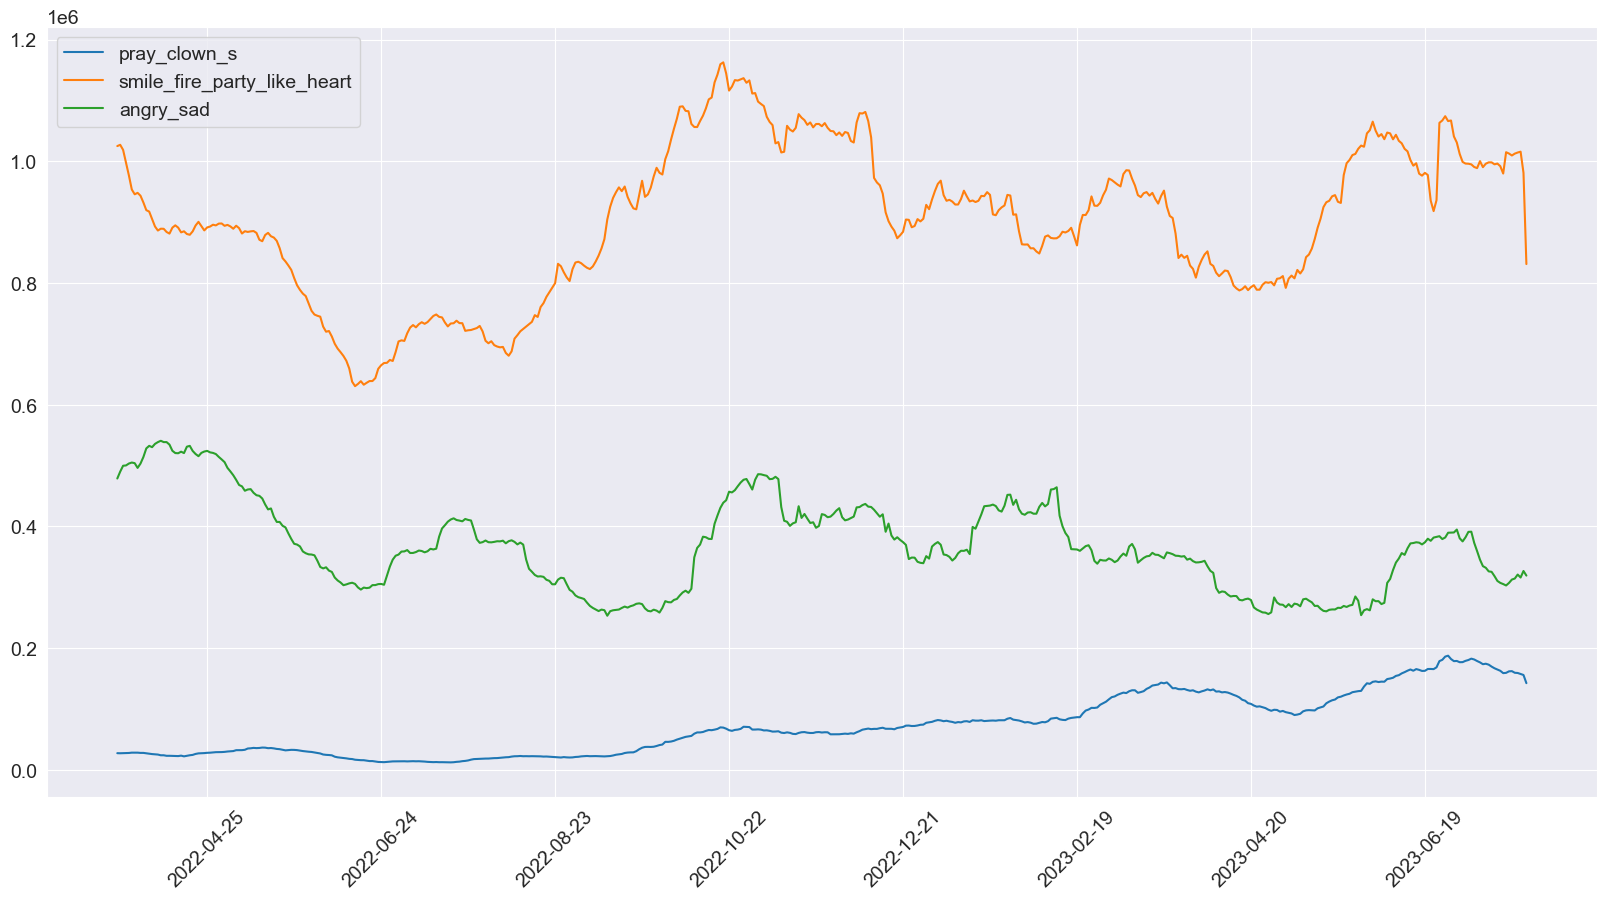

In [21]:
# plot time series of most popular reactions
fig, ax = plt.subplots()

# group by days, plot curve for each reaction
for r in reactions:
    group = merged_df.groupby("date")[r].sum()
    group = group.rolling(30).mean()  # Smooth the data with a moving average

    ax.plot(group.index, group.values, label=r)  # Plot the time series for the reaction

fig.set_size_inches(20, 10)
plt.rcParams.update({"font.size": 14})
ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))  # Auto-select the number of x-axis ticks
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [22]:
# count messages without nan
merged_df.count()

id                             214566
source                         214566
date                           214566
time                           214566
text                           214566
views                          214566
forwards                       214566
containing_media               214566
smile_fire_party_like_heart    214566
pray_clown_s                   214566
angry_sad                      214566
dtype: int64

In [23]:
# rename smile_fire_party_like_heart as positive
merged_df.rename(columns={"smile_fire_party_like_heart": "positive"}, inplace=True)

# rename angry_sad as negative
merged_df.rename(columns={"angry_sad": "negative"}, inplace=True)

# rename pray_clown_s as mixed
merged_df.rename(columns={"pray_clown_s": "mixed"}, inplace=True)

merged_df.head()

,id,source,date,time,text,views,forwards,containing_media,positive,mixed,negative
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24,15:21:38,🏦 Колишні російські власники вже державного С...,52846,45,False,108.0,7.0,487.0
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24,14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636,0,False,560.0,0.0,6.0
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24,14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,81139,214,True,56.0,2182.0,88.0
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24,13:56:32,Більш ніж половина українських громадян — 56% ...,88168,46,True,546.0,24.0,18.0
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24,13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748,58,True,2589.0,31.0,7.0


In [24]:
# add sum of reactions column
reactions = ["positive", "negative", "mixed"]
merged_df["sum"] = merged_df[reactions].sum(axis=1)

# replace all reactions with % of reactions on that message
for reaction in reactions:
    merged_df[reaction] = merged_df[reaction] / merged_df["sum"]

# fill NaN with 0
merged_df = merged_df.fillna(0)
merged_df

,id,source,date,time,text,views,forwards,containing_media,positive,mixed,negative,sum
0,51968,Україна⚡️Новини⚡️Війна,2023-07-24,15:21:38,🏦 Колишні російські власники вже державного С...,52846,45,False,0.179402,0.011628,0.808970,602.0
1,51966,Україна⚡️Новини⚡️Війна,2023-07-24,14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636,0,False,0.989399,0.000000,0.010601,566.0
2,51965,Україна⚡️Новини⚡️Війна,2023-07-24,14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,81139,214,True,0.024076,0.938091,0.037833,2326.0
3,51963,Україна⚡️Новини⚡️Війна,2023-07-24,13:56:32,Більш ніж половина українських громадян — 56% ...,88168,46,True,0.928571,0.040816,0.030612,588.0
4,51962,Україна⚡️Новини⚡️Війна,2023-07-24,13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748,58,True,0.985535,0.011801,0.002665,2627.0
...,...,...,...,...,...,...,...,...,...,...,...,...
220054,2554,Ukraine NOW,2022-02-24,07:52:18,"Друзі, ми розуміємо тривожність ситуації. Про...",443419,1519,False,0.929336,0.000000,0.070664,9057.0
220055,2553,Ukraine NOW,2022-02-24,06:55:26,Звернення Президента України Володимира Зеленс...,538686,9141,True,0.780949,0.000000,0.219051,8199.0
220056,2552,Ukraine NOW,2022-02-24,01:08:39,"​​‼️На території всієї України, окрім Донеччи...",569411,3842,True,0.377944,0.000000,0.622056,3609.0
220807,36620,Ukraine NOW,2023-07-24,12:57:49,Голові Державної судової адміністрації України...,72049,135,True,0.894933,0.000000,0.105067,1342.0


In [25]:
# run lang detection on text column
DetectorFactory.seed = 0

for i, text in enumerate(merged_df["text"]):
    try:
        merged_df.loc[i, "lang"] = detect(text)
    except:
        merged_df.loc[i, "lang"] = "unknown"

    if i % 100 == 0:
        print(f"Processed {i}/{merged_df.shape[0]} messages", end="\r")

merged_df

,id,source,date,time,text,views,forwards,containing_media,positive,mixed,negative,sum,lang
0,51968.0,Україна⚡️Новини⚡️Війна,2023-07-24,15:21:38,🏦 Колишні російські власники вже державного С...,52846.0,45.0,False,0.179402,0.011628,0.808970,602.0,uk
1,51966.0,Україна⚡️Новини⚡️Війна,2023-07-24,14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636.0,0.0,False,0.989399,0.000000,0.010601,566.0,uk
2,51965.0,Україна⚡️Новини⚡️Війна,2023-07-24,14:20:49,Говорящая голова бульбафюрера Азарёнок на глав...,81139.0,214.0,True,0.024076,0.938091,0.037833,2326.0,ru
3,51963.0,Україна⚡️Новини⚡️Війна,2023-07-24,13:56:32,Більш ніж половина українських громадян — 56% ...,88168.0,46.0,True,0.928571,0.040816,0.030612,588.0,uk
4,51962.0,Україна⚡️Новини⚡️Війна,2023-07-24,13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748.0,58.0,True,0.985535,0.011801,0.002665,2627.0,uk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
193643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
193644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk
193645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uk


In [26]:
# drop messages which are not in uk
merged_df = merged_df[merged_df["lang"] == "uk"]
merged_df = merged_df.drop(["lang"], axis=1)
merged_df

,id,source,date,time,text,views,forwards,containing_media,positive,mixed,negative,sum
0,51968.0,Україна⚡️Новини⚡️Війна,2023-07-24,15:21:38,🏦 Колишні російські власники вже державного С...,52846.0,45.0,False,0.179402,0.011628,0.808970,602.0
1,51966.0,Україна⚡️Новини⚡️Війна,2023-07-24,14:46:22,❤️‍🩹 Кожна хвилина на фронті - це життя війсь...,70636.0,0.0,False,0.989399,0.000000,0.010601,566.0
3,51963.0,Україна⚡️Новини⚡️Війна,2023-07-24,13:56:32,Більш ніж половина українських громадян — 56% ...,88168.0,46.0,True,0.928571,0.040816,0.030612,588.0
4,51962.0,Україна⚡️Новини⚡️Війна,2023-07-24,13:04:26,"""Це процес, який буде тривати і набирати оберт...",101748.0,58.0,True,0.985535,0.011801,0.002665,2627.0
5,51961.0,Україна⚡️Новини⚡️Війна,2023-07-24,12:30:43,Нардепу від ОПЗЖ Пономарьову СБУ повідомила пр...,107323.0,56.0,True,0.889975,0.007222,0.102804,2354.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# save to csv
name = "processed_data_temp.csv"
merged_df.to_csv(f"../data/{name}", index=False)

In [143]:
df.shape

(220809, 75)

In [46]:
from time import time
import humanize
import os
import json
import pickle


wtoe = {
    "like": "👍",
    "heart": "❤",
    "smile": "😁",
    "angry": "🤬",
    "sad": "😢",
    "fire": "🔥",
    "scream": "😱",
}
etow = {v: k for k, v in wtoe.items()}

def file_to_df(path, print_process=False):
    total_bytes = os.path.getsize(path)
    print("Total size of file: ", humanize.naturalsize(total_bytes))

    # read_as_bytes_start = time()
    # with open(path, "rb") as f:
    #     data = f.read().decode("utf-8")
    # if print_process:
    #     print(f"Time to read as bytes: {round(time() - read_as_bytes_start, 2)}s")

    read_pickle_start = time()
    with open(path, "rb") as f:
        data = pickle.load(f)
    if print_process:
        print(f"Time to read pickle: {round(time() - read_pickle_start, 2)}s")

    time_to_convert_to_json_start = time()
    data = json.loads(data)
    if print_process:
        print(f"Time to convert to json: {round(time() - time_to_convert_to_json_start, 2)}s")

    df_data = []
    # add columns id, date, text, views, forwards, reactions (5 types by emoji 👍❤😁🤬😢)

    prepare_data_start = time()
    for i, message in enumerate(data):
        message = data[message]
        # skip if contain media
        if "media" in message:
            continue
        # check if contain all keys
        if not all(key in message for key in ("id", "date", "text", "views", "forwards", "reactions")):
            continue
        # check if reactions did not contain any other emoji
        if not all(r["emoji"] in wtoe.values() for r in message["reactions"]["reactions"]):
            continue

        # struct of message reactions
        # message -> reactions -> [list of reactions] -> reaction -> (type, emoji, count)
        reactions = message["reactions"]["reactions"]

        prepared_message = {
            "id": message["id"],
            "date": message["date"].split(" ")[0],
            "time": message["date"].split(" ")[1],
            "text": message["text"],
            "views": message["views"],
            "forwards": message["forwards"],
            # "reactions": {"like": 0, "love": 0, "haha": 0, "angry": 0, "sad": 0},
        }
        for r in reactions:
            prepared_message[etow[r["emoji"]]] = r["count"]

        df_data.append(prepared_message)

        if i % 100 == 0 and print_process:
            print(f"Processed {i} messages", end="\r")

    if print_process:
        print(f"Time to prepare data: {round(time() - prepare_data_start, 2)}s")
    return pd.DataFrame(df_data)

In [47]:
df = file_to_df(data_path, print_process=False)
print(f"Shape of df: {df.shape}")
df.head(20)

Total size of file:  6.6 MB


TypeError: the JSON object must be str, bytes or bytearray, not list

In [41]:
en_alphabet = "abcdefghijklmnopqrstuvwxyz"
ua_alphabet = "абвгґдеєжзиіїйклмнопрстуфхцчшщьюя"
nums = "0123456789"
symbols = ".,?!-'"
# replace everything except en, ua and nums with space
df["text"] = df["text"].apply(
    lambda x: "".join([c if c in en_alphabet + ua_alphabet + nums + symbols else " " for c in x.lower()]))
df.head(20)

,id,date,time,text,views,forwards,like,heart,smile,angry,sad,fire,scream
0,36347,2023-07-19,17:59:02,"зерновий коридор не буде у безпеці, якщо оон...",116486,69,2336.0,141.0,31.0,23.0,14.0,NaN,NaN
1,36348,2023-07-19,18:31:25,"у міноборони рф заявили, що усі кораблі, які п...",120131,166,72.0,14.0,206.0,2576.0,18.0,NaN,NaN
2,36349,2023-07-19,18:39:43,міжнародний кримінальний суд приділяє недостат...,116491,34,1610.0,26.0,14.0,120.0,5.0,NaN,NaN
3,36350,2023-07-19,18:48:14,ситуація на фронті за добу противник і надалі...,118443,17,1143.0,165.0,5.0,10.0,25.0,NaN,NaN
4,36351,2023-07-19,19:25:34,"резніков сказав, коли в україні будуть літаки ...",116430,109,1313.0,56.0,39.0,117.0,453.0,NaN,NaN
5,36353,2023-07-19,19:54:08,сша оголосили про новий пакет військової допом...,129528,51,1945.0,342.0,12.0,15.0,10.0,NaN,NaN
6,36354,2023-07-19,20:44:00,до білорусі прибули ще мінімум 150 одиниць тех...,131928,149,121.0,33.0,210.0,1936.0,21.0,NaN,NaN
7,36356,2023-07-19,22:05:14,"путін назвав умови, за яких росія повернеться ...",143890,444,139.0,26.0,1208.0,4181.0,21.0,NaN,NaN
8,36357,2023-07-19,23:15:29,головні новини за 19 липня вночі ворог а...,138258,22,810.0,129.0,9.0,25.0,62.0,NaN,NaN
9,36358,2023-07-19,23:43:41,голова білоруського червоного хреста підтверди...,150159,67,285.0,39.0,12.0,2425.0,19.0,NaN,NaN


In [42]:
def replace_numbers(text):
    def replace_number(match):
        num = int(match.group())
        if num < 100:
            return 'nsmalln'
        elif num < 1000:
            return 'nmediumn'
        elif num < 10000:
            return 'ngibn'
        else:
            return 'nhugen'

    import re
    return re.sub(r'\b\d+\b', replace_number, text)

df["text"] = df["text"].apply(replace_numbers)
df.head(20)

,id,date,time,text,views,forwards,like,heart,smile,angry,sad,fire,scream
0,36347,2023-07-19,17:59:02,"зерновий коридор не буде у безпеці, якщо оон...",116486,69,2336.0,141.0,31.0,23.0,14.0,NaN,NaN
1,36348,2023-07-19,18:31:25,"у міноборони рф заявили, що усі кораблі, які п...",120131,166,72.0,14.0,206.0,2576.0,18.0,NaN,NaN
2,36349,2023-07-19,18:39:43,міжнародний кримінальний суд приділяє недостат...,116491,34,1610.0,26.0,14.0,120.0,5.0,NaN,NaN
3,36350,2023-07-19,18:48:14,ситуація на фронті за добу противник і надалі...,118443,17,1143.0,165.0,5.0,10.0,25.0,NaN,NaN
4,36351,2023-07-19,19:25:34,"резніков сказав, коли в україні будуть літаки ...",116430,109,1313.0,56.0,39.0,117.0,453.0,NaN,NaN
5,36353,2023-07-19,19:54:08,сша оголосили про новий пакет військової допом...,129528,51,1945.0,342.0,12.0,15.0,10.0,NaN,NaN
6,36354,2023-07-19,20:44:00,до білорусі прибули ще мінімум nmediumn одиниц...,131928,149,121.0,33.0,210.0,1936.0,21.0,NaN,NaN
7,36356,2023-07-19,22:05:14,"путін назвав умови, за яких росія повернеться ...",143890,444,139.0,26.0,1208.0,4181.0,21.0,NaN,NaN
8,36357,2023-07-19,23:15:29,головні новини за nsmalln липня вночі во...,138258,22,810.0,129.0,9.0,25.0,62.0,NaN,NaN
9,36358,2023-07-19,23:43:41,голова білоруського червоного хреста підтверди...,150159,67,285.0,39.0,12.0,2425.0,19.0,NaN,NaN


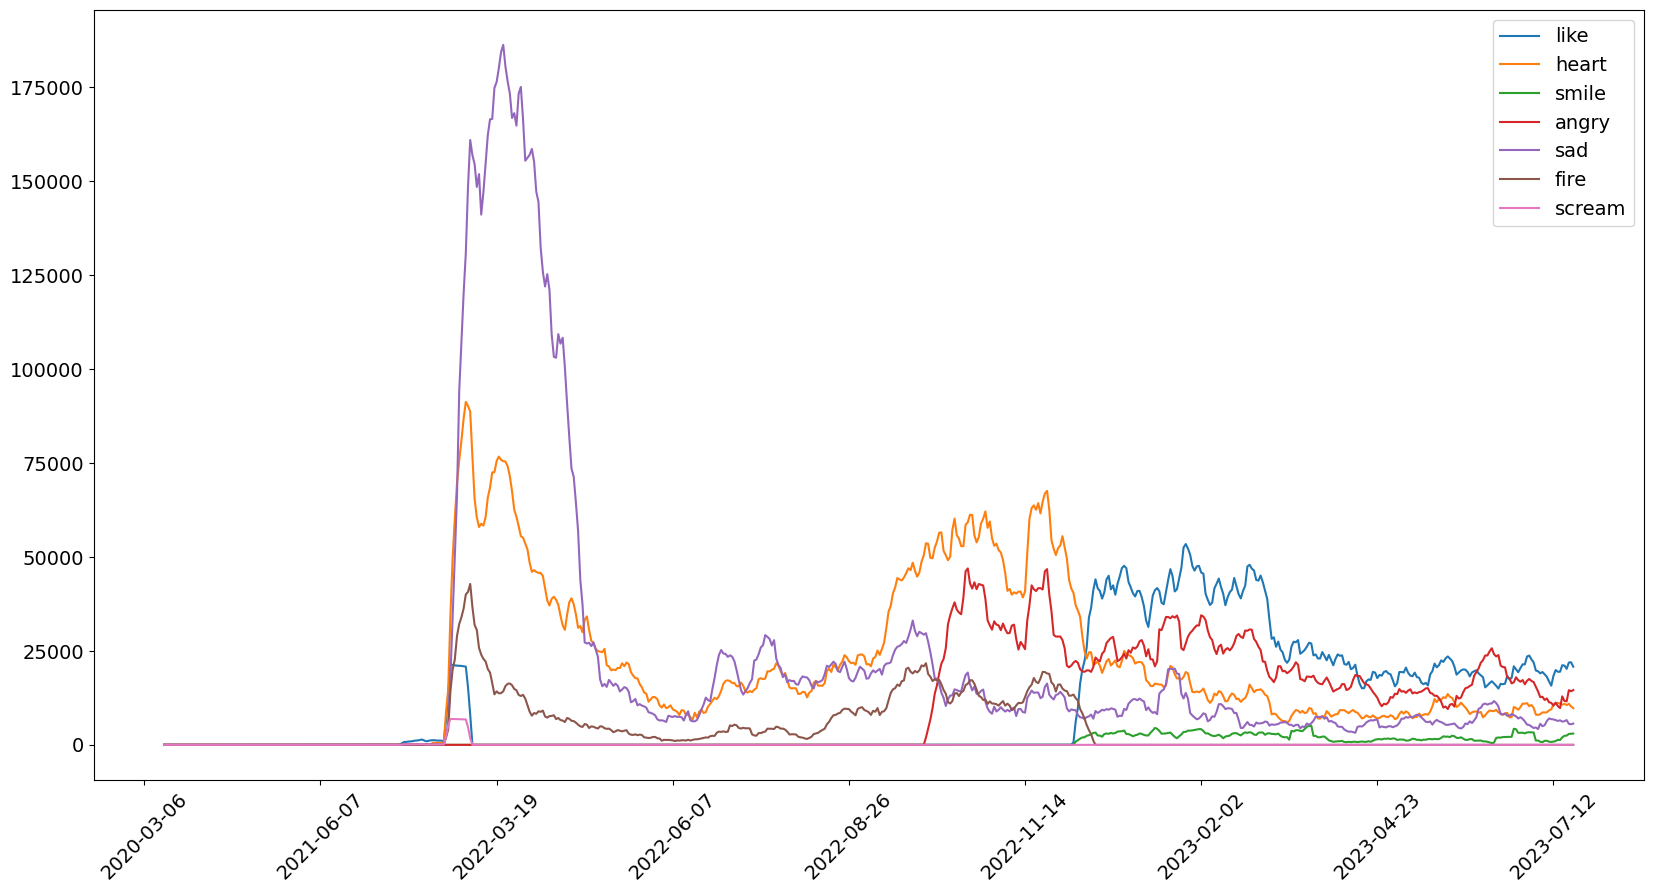

In [32]:
from matplotlib.ticker import MaxNLocator


def plot_reaction_time_series(_df, _etow, moving_average_window=10):
    fig, ax = plt.subplots()

    for r in _etow.values():
        group = _df.groupby("date")[r].sum()
        group = group.rolling(moving_average_window).mean()  # Smooth the data with a moving average

        ax.plot(group.index, group.values, label=r)  # Plot the time series for the reaction

    fig.set_size_inches(20, 10)
    plt.rcParams.update({"font.size": 14})
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))  # Auto-select the number of x-axis ticks
    plt.xticks(rotation=45)
    ax.legend()
    plt.show()

def plot_value_time_series(_df, _etow, key, moving_average_window=10):
    fig, ax = plt.subplots()

    group = _df.groupby("date")[key].sum()
    group = group.rolling(moving_average_window).mean()  # Smooth the data with a moving average

    ax.plot(group.index, group.values, label=key)  # Plot the time series for the reaction

    fig.set_size_inches(20, 10)
    plt.rcParams.update({"font.size": 14})
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))  # Auto-select the number of x-axis ticks
    plt.xticks(rotation=45)
    ax.legend()
    plt.show()

plot_reaction_time_series(df, etow)

In [33]:
# drop all rows where is fire or scream reaction, then drop these columns
# copy df to
cut_df = df.copy()
cut_df = cut_df.drop(df[df["fire"] > 0].index)
cut_df = cut_df.drop(cut_df[cut_df["scream"] > 0].index)
cut_df = cut_df.drop(["fire", "scream"], axis=1)
print(f"Shape of df: {cut_df.shape}")
cut_df.head(20)

Shape of df: (5433, 11)


,id,date,time,text,views,forwards,like,heart,smile,angry,sad
0,36347,2023-07-19,17:59:02,зерновий коридор не буде у безпеці якщо оон...,116486,69,2336.0,141.0,31.0,23.0,14.0
1,36348,2023-07-19,18:31:25,у міноборони рф заявили що усі кораблі які п...,120131,166,72.0,14.0,206.0,2576.0,18.0
2,36349,2023-07-19,18:39:43,міжнародний кримінальний суд приділяє недостат...,116491,34,1610.0,26.0,14.0,120.0,5.0
3,36350,2023-07-19,18:48:14,ситуація на фронті за добу противник і надалі...,118443,17,1143.0,165.0,5.0,10.0,25.0
4,36351,2023-07-19,19:25:34,резніков сказав коли в україні будуть літаки ...,116430,109,1313.0,56.0,39.0,117.0,453.0
5,36353,2023-07-19,19:54:08,сша оголосили про новий пакет військової допом...,129528,51,1945.0,342.0,12.0,15.0,10.0
6,36354,2023-07-19,20:44:00,до білорусі прибули ще мінімум nmediumn одиниц...,131928,149,121.0,33.0,210.0,1936.0,21.0
7,36356,2023-07-19,22:05:14,путін назвав умови за яких росія повернеться ...,143890,444,139.0,26.0,1208.0,4181.0,21.0
8,36357,2023-07-19,23:15:29,головні новини за nsmalln липня вночі во...,138258,22,810.0,129.0,9.0,25.0,62.0
9,36358,2023-07-19,23:43:41,голова білоруського червоного хреста підтверди...,150159,67,285.0,39.0,12.0,2425.0,19.0


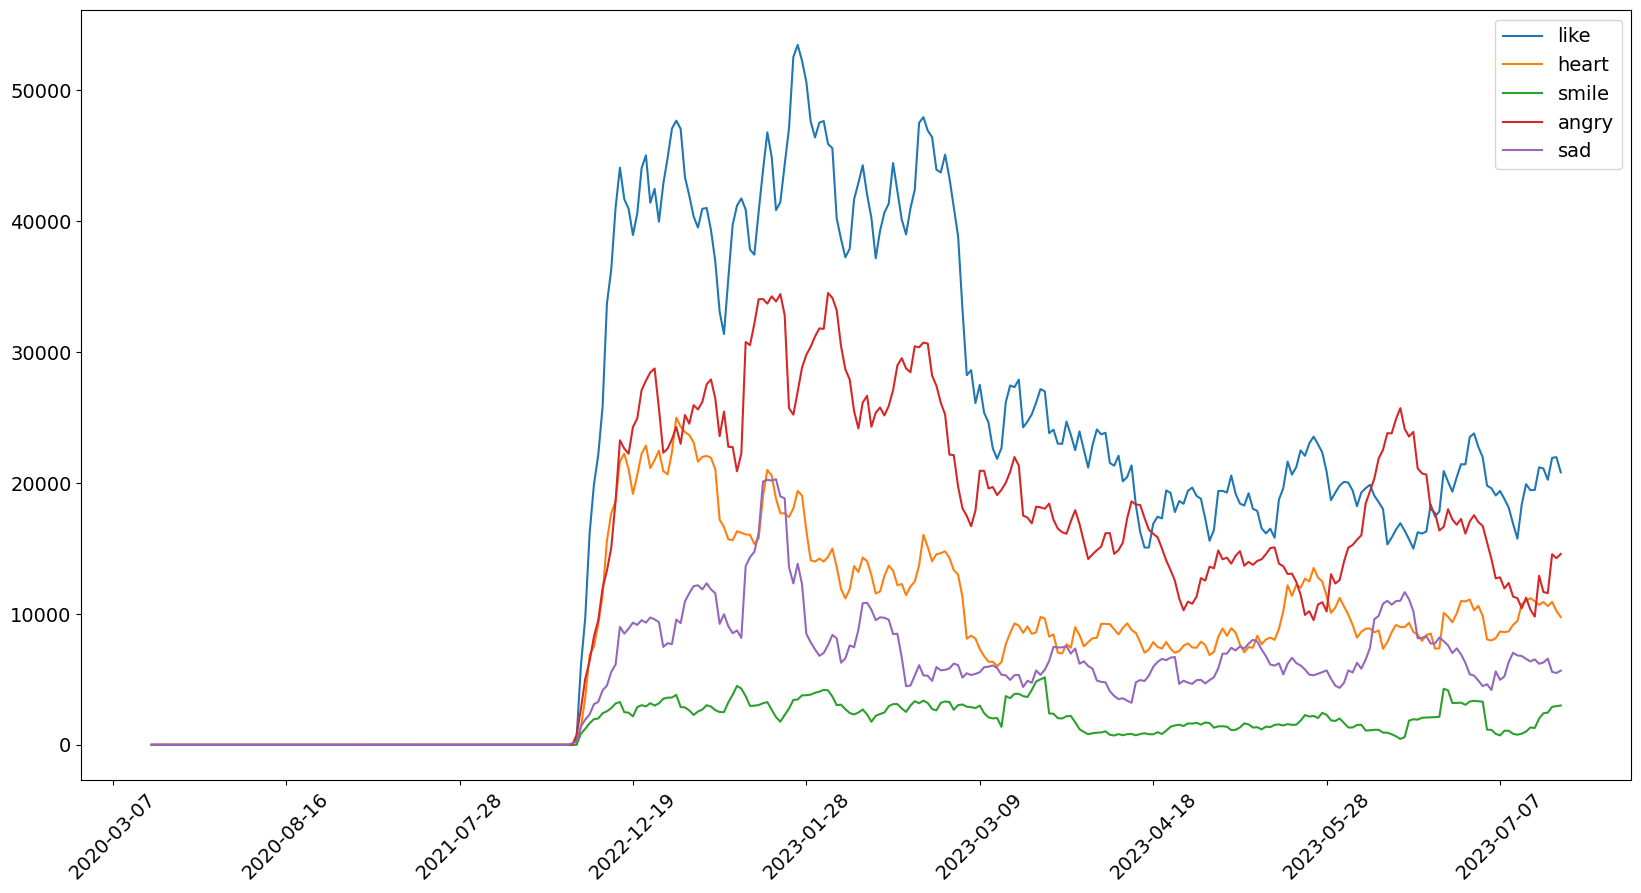

In [34]:
# plot again
cut_etow = {k: v for k, v in etow.items() if v not in ("fire", "scream")}
plot_reaction_time_series(cut_df, cut_etow)

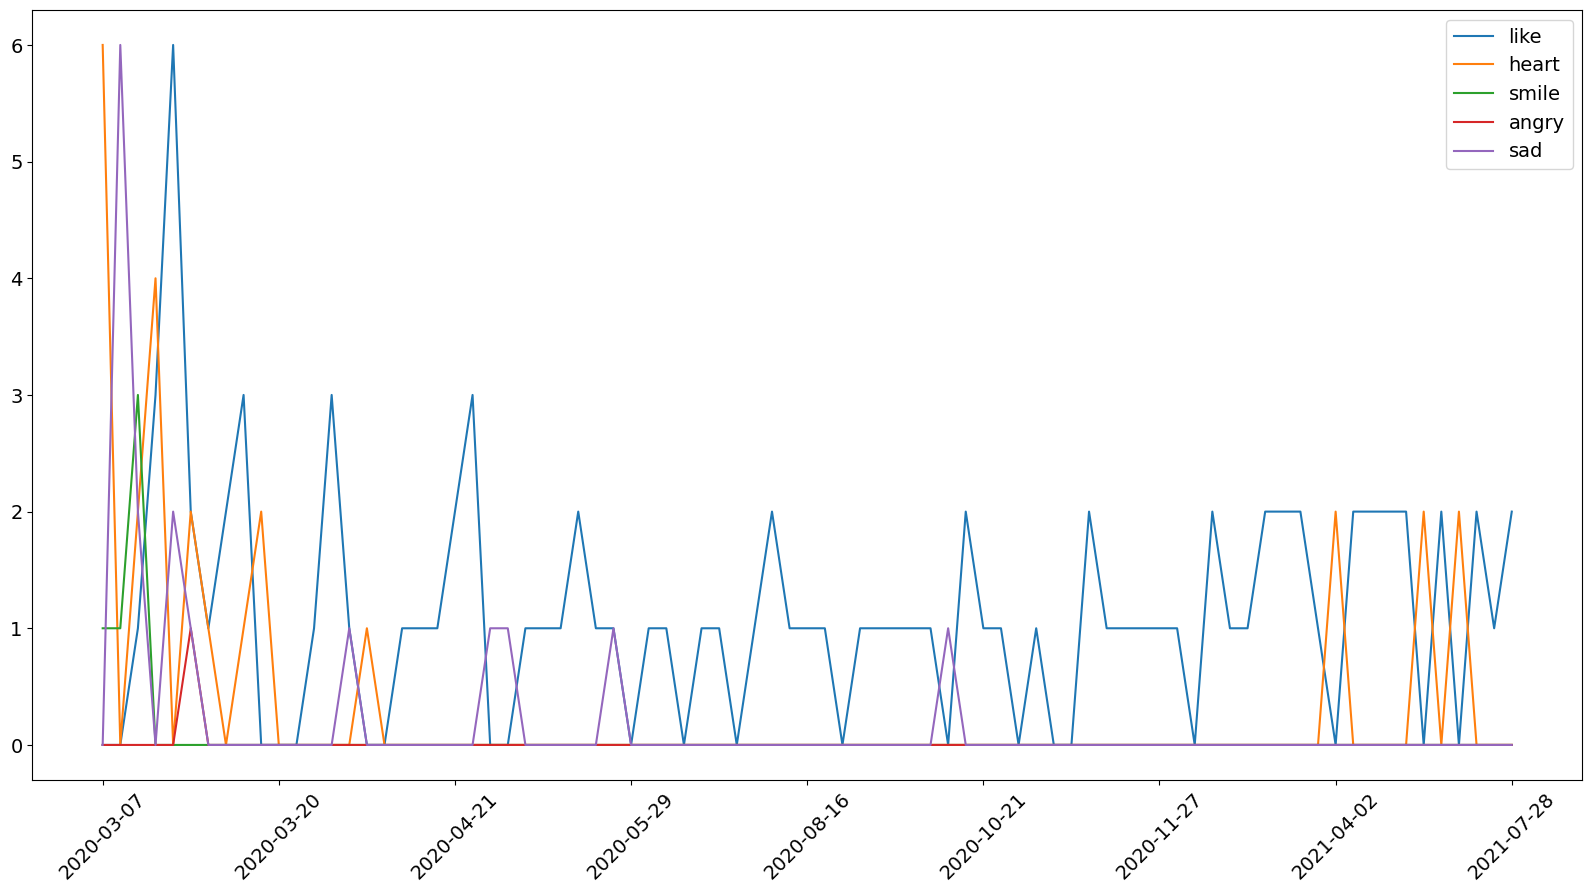

In [35]:
# plot from 2020-03-07 to 2021-07-28
timecut_df = cut_df[(cut_df["date"] >= "2020-03-07") & (cut_df["date"] <= "2021-07-28")]
plot_reaction_time_series(timecut_df, cut_etow, moving_average_window=1)

In [36]:
timecut_df.head(20)

,id,date,time,text,views,forwards,like,heart,smile,angry,sad
14834,1865,2021-07-09,11:34:57,влада токіо введе надзвичайну ситуацію на пері...,188478,78,1.0,NaN,NaN,NaN,NaN
14835,1915,2021-07-28,18:06:07,україна запровадила нові правила перетину корд...,190785,1698,2.0,NaN,NaN,NaN,NaN
14837,1755,2021-05-28,15:59:10,київ львів та одеса відкриють центри масової ...,216854,860,2.0,NaN,NaN,NaN,NaN
14838,1762,2021-05-31,17:45:35,епідемічні показники захворюваності на covid n...,200576,46,2.0,NaN,NaN,NaN,NaN
14839,1766,2021-06-01,17:30:47,тернопіль відкриє центр масової вакцинації нас...,203752,162,NaN,2.0,NaN,NaN,NaN
14840,1769,2021-06-02,13:35:31,україна відновила залізничне сполучення з авст...,216526,565,2.0,NaN,NaN,NaN,NaN
14841,1770,2021-06-02,18:10:53,в єс почали видавати цифрові covid сертифікати...,206727,472,NaN,NaN,NaN,NaN,NaN
14842,1781,2021-06-07,13:28:49,щеплені проти covid nsmalln можуть отримати мі...,208096,635,NaN,2.0,NaN,NaN,NaN
14843,1788,2021-06-09,15:46:38,україна готова до нових пом якшень карантину ...,205079,140,2.0,NaN,NaN,NaN,NaN
14844,1650,2021-04-15,15:36:03,в україні вакцинують паралімпійців та олімпійц...,265554,129,2.0,NaN,NaN,NaN,NaN


In [37]:
# get all messages from cut_df where sum of reactions is more than 50
cut_df["sum"] = cut_df[cut_etow.values()].sum(axis=1)
reaction_df = cut_df[cut_df["sum"] > 100]
print(f"Shape of df: {reaction_df.shape}")
reaction_df

Shape of df: (5305, 12)


,id,date,time,text,views,forwards,like,heart,smile,angry,sad,sum
0,36347,2023-07-19,17:59:02,зерновий коридор не буде у безпеці якщо оон...,116486,69,2336.0,141.0,31.0,23.0,14.0,2545.0
1,36348,2023-07-19,18:31:25,у міноборони рф заявили що усі кораблі які п...,120131,166,72.0,14.0,206.0,2576.0,18.0,2886.0
2,36349,2023-07-19,18:39:43,міжнародний кримінальний суд приділяє недостат...,116491,34,1610.0,26.0,14.0,120.0,5.0,1775.0
3,36350,2023-07-19,18:48:14,ситуація на фронті за добу противник і надалі...,118443,17,1143.0,165.0,5.0,10.0,25.0,1348.0
4,36351,2023-07-19,19:25:34,резніков сказав коли в україні будуть літаки ...,116430,109,1313.0,56.0,39.0,117.0,453.0,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14938,36441,2023-07-21,14:25:11,журналіста російського пропагандистського змі ...,70405,71,1890.0,44.0,323.0,26.0,NaN,2283.0
14939,36032,2023-07-13,19:39:06,європарламент ухвалив акт на підтримку виробни...,119463,37,1661.0,163.0,18.0,5.0,2.0,1849.0
14940,35828,2023-07-08,20:08:16,речник путіна дмитро пєсков назвав порушенням...,160751,265,599.0,90.0,3984.0,53.0,11.0,4737.0
14941,35618,2023-07-04,08:55:22,внаслідок атаки бпла на суми загинуло троє л...,143837,48,62.0,25.0,11.0,271.0,2965.0,3334.0


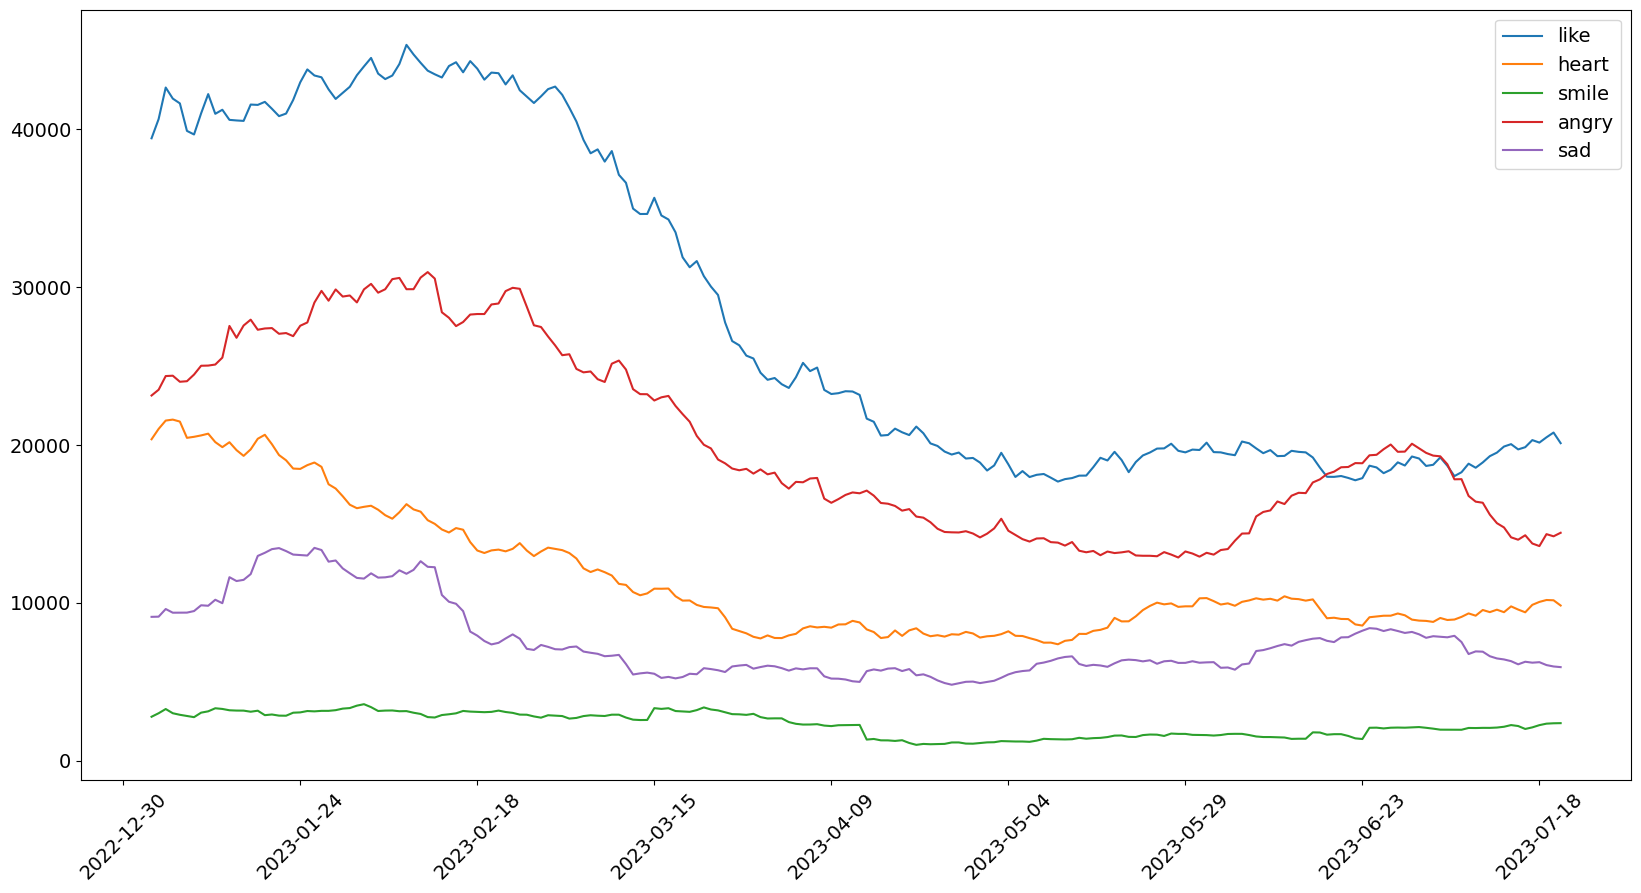

In [38]:
# plot again
plot_reaction_time_series(reaction_df, cut_etow, moving_average_window=30)

In [39]:
avg_message_length = reaction_df["text"].apply(lambda x: len(x.split(" "))).mean()
print(f"Average message words count: {int(avg_message_length)}")

Average message words count: 87


In [12]:
# create a copy of reaction_df
to_save_df = reaction_df.copy()

# add trigger column = sum of reactions / views
to_save_df["trigger"] = to_save_df[cut_etow.values()].sum(axis=1) / to_save_df["views"]

# replace all reactions with % of reactions on that message
for reaction in cut_etow.values():
    to_save_df[reaction] = to_save_df[reaction] / to_save_df["sum"]
# fill NaN with 0
to_save_df = to_save_df.fillna(0)
to_save_df = to_save_df.drop(["sum"], axis=1)
to_save_df.head()

,id,date,time,text,views,forwards,like,heart,smile,angry,sad,trigger
0,36347,2023-07-19,17:59:02,"""Зерновий коридор"" не буде у безпеці, якщо ООН...",116486,69,0.917878,0.055403,0.012181,0.009037,0.005501,0.021848
1,36348,2023-07-19,18:31:25,"У міноборони рф заявили, що усі кораблі, які п...",120131,166,0.024948,0.004851,0.071379,0.892585,0.006237,0.024024
2,36349,2023-07-19,18:39:43,Міжнародний кримінальний суд приділяє недостат...,116491,34,0.907042,0.014648,0.007887,0.067606,0.002817,0.015237
3,36350,2023-07-19,18:48:14,Ситуація на фронті за добу\n\nПротивник і нада...,118443,17,0.847923,0.122404,0.003709,0.007418,0.018546,0.011381
4,36351,2023-07-19,19:25:34,"Резніков сказав, коли в Україні будуть літаки ...",116430,109,0.663802,0.028311,0.019717,0.059151,0.229019,0.016989


In [13]:
# add spread column = forwards / views
to_save_df["spread"] = to_save_df["forwards"] / to_save_df["views"]
to_save_df.head()

,id,date,time,text,views,forwards,like,heart,smile,angry,sad,trigger,spread
0,36347,2023-07-19,17:59:02,"""Зерновий коридор"" не буде у безпеці, якщо ООН...",116486,69,0.917878,0.055403,0.012181,0.009037,0.005501,0.021848,0.000592
1,36348,2023-07-19,18:31:25,"У міноборони рф заявили, що усі кораблі, які п...",120131,166,0.024948,0.004851,0.071379,0.892585,0.006237,0.024024,0.001382
2,36349,2023-07-19,18:39:43,Міжнародний кримінальний суд приділяє недостат...,116491,34,0.907042,0.014648,0.007887,0.067606,0.002817,0.015237,0.000292
3,36350,2023-07-19,18:48:14,Ситуація на фронті за добу\n\nПротивник і нада...,118443,17,0.847923,0.122404,0.003709,0.007418,0.018546,0.011381,0.000144
4,36351,2023-07-19,19:25:34,"Резніков сказав, коли в Україні будуть літаки ...",116430,109,0.663802,0.028311,0.019717,0.059151,0.229019,0.016989,0.000936


In [14]:
# drop id, date, time, views, forwards
to_save_df = to_save_df.drop(["id", "date", "time", "views", "forwards"], axis=1)
to_save_df.head()

,text,like,heart,smile,angry,sad,trigger,spread
0,"""Зерновий коридор"" не буде у безпеці, якщо ООН...",0.917878,0.055403,0.012181,0.009037,0.005501,0.021848,0.000592
1,"У міноборони рф заявили, що усі кораблі, які п...",0.024948,0.004851,0.071379,0.892585,0.006237,0.024024,0.001382
2,Міжнародний кримінальний суд приділяє недостат...,0.907042,0.014648,0.007887,0.067606,0.002817,0.015237,0.000292
3,Ситуація на фронті за добу\n\nПротивник і нада...,0.847923,0.122404,0.003709,0.007418,0.018546,0.011381,0.000144
4,"Резніков сказав, коли в Україні будуть літаки ...",0.663802,0.028311,0.019717,0.059151,0.229019,0.016989,0.000936


In [16]:
# save to csv
to_save_df.to_csv("../data/processed_data.csv", index=False)
# print info
print(f"Shape of df: {to_save_df.shape}")
print(f"Columns: {to_save_df.columns}")

Shape of df: (5305, 8)
Columns: Index(['text', 'like', 'heart', 'smile', 'angry', 'sad', 'trigger', 'spread'], dtype='object')
